## SEC Parser
Generally working pretty well -- this is the output from ~1.5 months of filing data

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

FILENAME = '~/OneDrive/parsed_data_20160602190031.csv'

df = pd.read_csv(FILENAME, encoding='latin_1', index_col=0)

print(df.shape)

(1662, 18)


In [156]:
# 1662 rows of data -- what does it look like?
print(df.columns)
print('\n')
df.head()

Index(['term', 'value', 'value_period', 'cik', 'accession', 'form',
       'form_period', 'form_submission', 'filing_url', 'excel_url',
       'excel_path', 'company', 'ticker', 'industry_id', 'industry', 'sector',
       'exchange', 'currency'],
      dtype='object')




,term,value,value_period,cik,accession,form,form_period,form_submission,filing_url,excel_url,excel_path,company,ticker,industry_id,industry,sector,exchange,currency
0,Accounts Payable,696117.0,2015-10-31,1100397,0001493152-16-007685,10-Q,2016-01-31,2016-02-26 17:11:28,http://www.sec.gov/Archives/edgar/data/1100397...,http://www.sec.gov/Archives/edgar/data/1100397...,c:\users\chris\anaconda3\lib\site-packages\dat...,Advaxis Inc,NaN,NaN,NaN,NaN,NaN,NaN
1,Accounts Payable,843534.0,2016-01-31,1100397,0001493152-16-007685,10-Q,2016-01-31,2016-02-26 17:11:28,http://www.sec.gov/Archives/edgar/data/1100397...,http://www.sec.gov/Archives/edgar/data/1100397...,c:\users\chris\anaconda3\lib\site-packages\dat...,Advaxis Inc,NaN,NaN,NaN,NaN,NaN,NaN
2,Accrued Expenses,3191941.0,2015-10-31,1100397,0001493152-16-007685,10-Q,2016-01-31,2016-02-26 17:11:28,http://www.sec.gov/Archives/edgar/data/1100397...,http://www.sec.gov/Archives/edgar/data/1100397...,c:\users\chris\anaconda3\lib\site-packages\dat...,Advaxis Inc,NaN,NaN,NaN,NaN,NaN,NaN
3,Accrued Expenses,6643934.0,2016-01-31,1100397,0001493152-16-007685,10-Q,2016-01-31,2016-02-26 17:11:28,http://www.sec.gov/Archives/edgar/data/1100397...,http://www.sec.gov/Archives/edgar/data/1100397...,c:\users\chris\anaconda3\lib\site-packages\dat...,Advaxis Inc,NaN,NaN,NaN,NaN,NaN,NaN
4,Accumulated Deficit,-134054259.0,2015-10-31,1100397,0001493152-16-007685,10-Q,2016-01-31,2016-02-26 17:11:28,http://www.sec.gov/Archives/edgar/data/1100397...,http://www.sec.gov/Archives/edgar/data/1100397...,c:\users\chris\anaconda3\lib\site-packages\dat...,Advaxis Inc,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
# data types represented in each column
df.dtypes

term                object
value               object
value_period        object
cik                  int64
accession           object
form                object
form_period         object
form_submission     object
filing_url          object
excel_url           object
excel_path          object
company             object
ticker              object
industry_id        float64
industry           float64
sector             float64
exchange            object
currency            object
dtype: object

In [158]:
# convert datetime columns

df.value_period = pd.to_datetime(df.value_period, yearfirst=True, infer_datetime_format=True)
print(df.value_period.head())

print('\n')

df.form_submission = pd.to_datetime(df.form_submission, yearfirst=True, infer_datetime_format=True)
print(df.form_submission.head())

0   2015-10-31
1   2016-01-31
2   2015-10-31
3   2016-01-31
4   2015-10-31
Name: value_period, dtype: datetime64[ns]


0   2016-02-26 17:11:28
1   2016-02-26 17:11:28
2   2016-02-26 17:11:28
3   2016-02-26 17:11:28
4   2016-02-26 17:11:28
Name: form_submission, dtype: datetime64[ns]


In [159]:
# value column being an object is a problem -- we want this to be a float. need to clean
df.value.value_counts().head(10)

0.0              61
                 50
Dec. 31, 2014    17
29532330000.0    12
25537000.0       12
10000.0           7
Jun. 30, 2015     7
31318532000.0     6
612282000.0       6
3549427.0         6
Name: value, dtype: int64

In [160]:
# non-numeric data in the value column
# how many numeric values do we see at first?
print(df['value'].head())
print('\n')
print(df['value'].apply(np.isreal).head())

0        696117.0
1        843534.0
2       3191941.0
3       6643934.0
4    -134054259.0
Name: value, dtype: object


0    False
1    False
2    False
3    False
4    False
Name: value, dtype: bool


In [161]:
# nothing right now -- they're all being considered strings.
# let's try to force conversion, ignoring errors (leaving the datatype)
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# now how many numeric?
print(df['value'].head())
print('\n')
print(df['value'].apply(np.isreal).head())
print('\n')
print(df['value'].apply(np.isreal).value_counts())

0       696117.0
1       843534.0
2      3191941.0
3      6643934.0
4   -134054259.0
Name: value, dtype: float64


0    True
1    True
2    True
3    True
4    True
Name: value, dtype: bool


True    1662
Name: value, dtype: int64


In [162]:
# looks like that did the trick
print(df.value.value_counts().head())

0.000000e+00    61
2.953233e+10    12
2.553700e+07    12
1.000000e+04     7
2.754510e+08     6
Name: value, dtype: int64


In [163]:
# let's drop the 0 values from our dataset
df = df[df['value'] > 0]

print(df.value.value_counts().head())

2.953233e+10    12
2.553700e+07    12
1.000000e+04     7
5.400000e+03     6
4.406200e+07     6
Name: value, dtype: int64


In [164]:
# number of unique companies
len(df.cik.unique())

14

In [165]:
# number of unique filings
len(df.accession.unique())

27

In [166]:
# number of unique accounting terms
len(df.term.unique())

224

In [167]:
# 10 most common accounting terms
df.term.value_counts().head(10)

Total liabilities             35
Total current liabilities     33
Total current assets          32
Cash and cash equivalents     28
Total assets                  27
Additional paid in capital    18
Accounts payable              17
Deferred income taxes         16
Cash                          16
Additional paid-in capital    16
Name: term, dtype: int64

In [168]:
# get list of most common accounting terms
# probably a better way to do this
common_terms = [key for key, val in df.term.value_counts().head().to_dict().items()]
print(common_terms)

['Cash and cash equivalents', 'Total assets', 'Total liabilities', 'Total current liabilities', 'Total current assets']


In [169]:
print(df[df.term.isin(common_terms)].head())
print('\n')
print(len(df[df.term.isin(common_terms)]))

                          term         value value_period      cik  \
72   Cash and cash equivalents  1.023350e+08   2015-12-31  1573516   
73   Cash and cash equivalents  2.947410e+08   2013-12-31  1573516   
74   Cash and cash equivalents  3.271630e+08   2014-12-31  1573516   
160               Total assets  1.886241e+09   2015-12-31  1573516   
161               Total assets  1.888564e+09   2013-12-31  1573516   

                accession  form form_period     form_submission  \
72   0001573516-16-000051  10-K  2015-12-31 2016-02-26 06:58:13   
73   0001573516-16-000051  10-K  2015-12-31 2016-02-26 06:58:13   
74   0001573516-16-000051  10-K  2015-12-31 2016-02-26 06:58:13   
160  0001573516-16-000051  10-K  2015-12-31 2016-02-26 06:58:13   
161  0001573516-16-000051  10-K  2015-12-31 2016-02-26 06:58:13   

                                            filing_url  \
72   http://www.sec.gov/Archives/edgar/data/1573516...   
73   http://www.sec.gov/Archives/edgar/data/1573516...   
74

                          term         value
72   Cash and cash equivalents  1.023350e+08
73   Cash and cash equivalents  2.947410e+08
74   Cash and cash equivalents  3.271630e+08
160               Total assets  1.886241e+09
161               Total assets  1.888564e+09




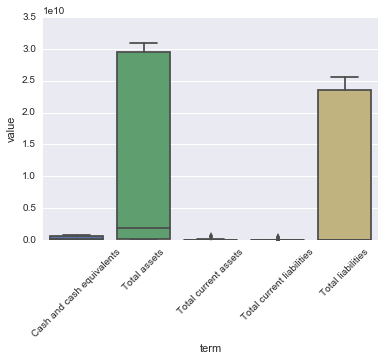

In [170]:
# boxplot of values for top 5 most common terms
print(df[df.term.isin(common_terms)][['term', 'value']].head())
print('\n')

sns.boxplot(x='term', y='value', data=df[df.term.isin(common_terms)][['term', 'value']])
sns.plt.xticks(rotation=45)
sns.plt.show()